In [48]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [49]:
df1 = pd.read_csv('datatraining.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df2= pd.read_csv('datatest.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df3= pd.read_csv('datatest2.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

#df4= pd.merge(df2, df1, how='outer')

#df=pd.merge(df4, df3, how='outer')
#df = df.set_index(['date'])

df3.shape

(9752, 7)

In [50]:
print(df1.shape,df2.shape,df3.shape)

(8143, 7) (2665, 7) (9752, 7)


In [51]:
del df3["HumidityRatio"]
df3 = df3.set_index(['date'])

In [52]:
df3.head()

,Temperature,Humidity,Light,CO2,Occupancy
date,,,,,
2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,1
2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,1
2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,1
2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,1
2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,1


In [53]:
ts=df3['Temperature']
ts1 = df3['Light']
ts.index

DatetimeIndex(['2015-02-11 14:48:00', '2015-02-11 14:49:00',
               '2015-02-11 14:50:00', '2015-02-11 14:51:00',
               '2015-02-11 14:51:59', '2015-02-11 14:53:00',
               '2015-02-11 14:54:00', '2015-02-11 14:55:00',
               '2015-02-11 14:55:59', '2015-02-11 14:57:00',
               ...
               '2015-02-18 09:10:00', '2015-02-18 09:10:59',
               '2015-02-18 09:11:59', '2015-02-18 09:13:00',
               '2015-02-18 09:14:00', '2015-02-18 09:15:00',
               '2015-02-18 09:16:00', '2015-02-18 09:16:59',
               '2015-02-18 09:17:59', '2015-02-18 09:19:00'],
              dtype='datetime64[ns]', name='date', length=9752, freq=None)

In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9752 entries, 2015-02-11 14:48:00 to 2015-02-18 09:19:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  9752 non-null   float64
 1   Humidity     9752 non-null   float64
 2   Light        9752 non-null   float64
 3   CO2          9752 non-null   float64
 4   Occupancy    9752 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 457.1 KB


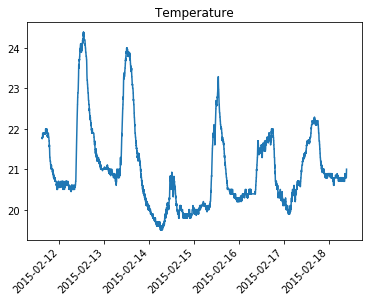

In [55]:
ts = pd.Series(ts, ts.index)


plt.plot(ts)
plt.title('Temperature')
plt.xticks(rotation=45, ha='right')
plt.show()


### Transformations

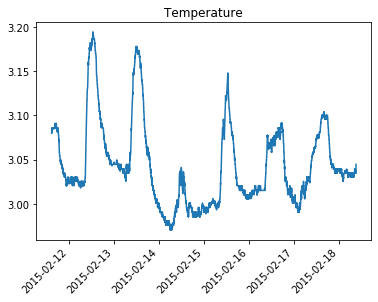

dtype('float64')

In [56]:
ts_log = np.log(ts)  #log transformation
plt.plot(ts.index, ts_log)
plt.xticks(rotation=45, ha='right')
plt.title('Temperature')
plt.show()
pd.Series(ts_log).dtype




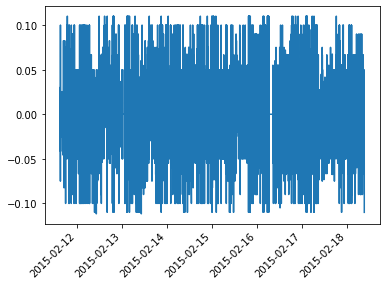

In [57]:
ts_diff = pd.Series(ts[:-1].values - ts[1:].values, index=ts.index[1:])
plt.plot(ts_diff)
plt.xticks(rotation=45, ha='right')
plt.show()




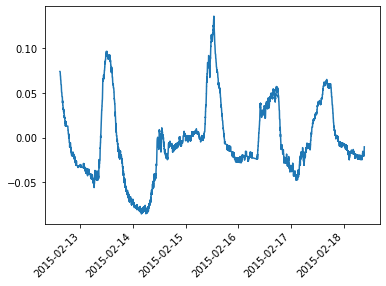

In [46]:
window = 60*24
ts_log_mov_diff = pd.Series(ts_log - ts_log.rolling(window, center=False).mean(), index=ts.index)
plt.plot(ts_log_mov_diff)
plt.xticks(rotation=45, ha='right')
plt.show()

### Autocorrelation and partial autocorrelation (original ts and transformed)

In [47]:
from statsmodels.tsa.stattools import acf, pacf

In [27]:
#ts=pd.to_datetime(ts) #lo faccio perché acf vuole timeseries e type(ts)=float
lag_acf = acf(ts, nlags=50) #input:timeseries data
lag_pacf = pacf(ts, nlags=50, method='ols')

C:\Users\Gianmarco\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


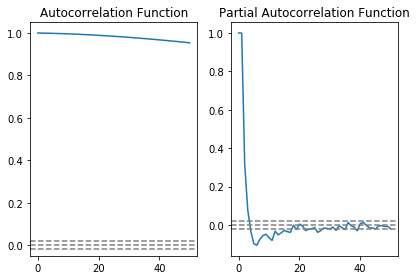

In [28]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Gianmarco\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


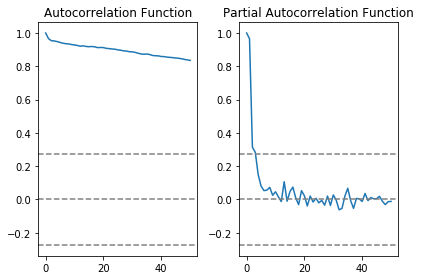

In [29]:
ts_log=pd.to_datetime(ts_log)
lag_acf = acf(ts_log.values[11:], nlags=50)
lag_pacf = pacf(ts_log[11:], nlags=50, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Gianmarco\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
C:\Users\Gianmarco\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:578: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


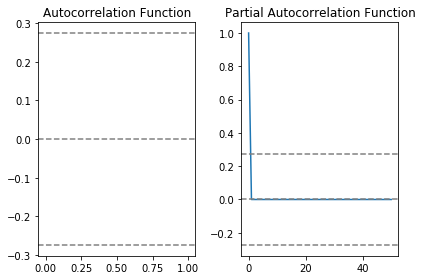

In [30]:
ts_diff=pd.to_datetime(ts_diff)
lag_acf = acf(ts_diff.values[11:], nlags=50)
lag_pacf = pacf(ts_diff[11:], nlags=50, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Gianmarco\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


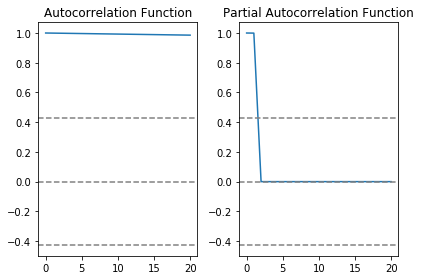

In [31]:
ts_log_mov_diff=pd.to_datetime(ts_log_mov_diff)
lag_acf = acf(ts_log_mov_diff.values[11:], nlags=20)
lag_pacf = pacf(ts_log_mov_diff[11:], nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AC Plot

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

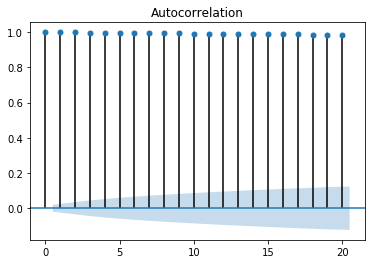

In [35]:
plot_acf(ts_log_mov_diff.values[11:], lags=20)

plt.show()

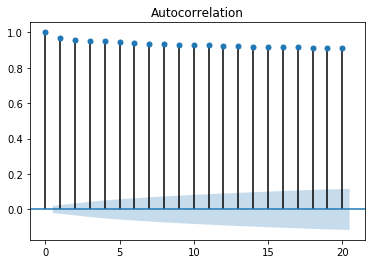

In [36]:
plot_acf(ts_log.values[11:], lags=20)
plt.show()

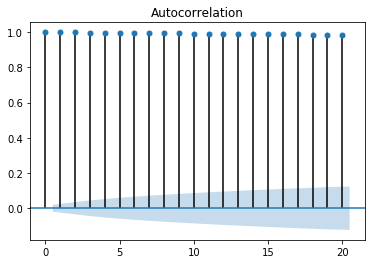

In [37]:
plot_acf(ts_log_mov_diff.values[11:], lags=20)
plt.show()

C:\Users\Gianmarco\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:578: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


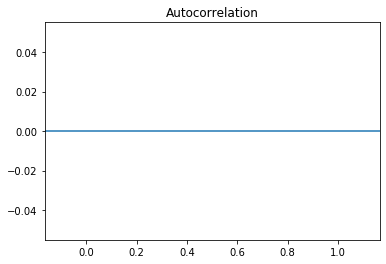

In [38]:
plot_acf(ts_diff.values[11:], lags=20)
plt.show()

### PAC Plot

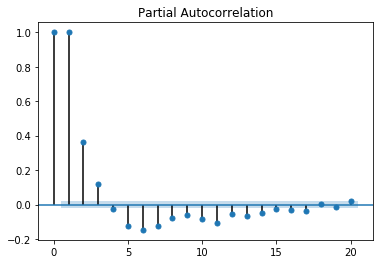

In [39]:
plot_pacf(ts.values[11:], lags=20)
plt.show()

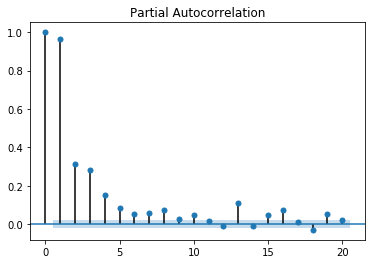

In [40]:
plot_pacf(ts_log.values[11:], lags=20)
plt.show()

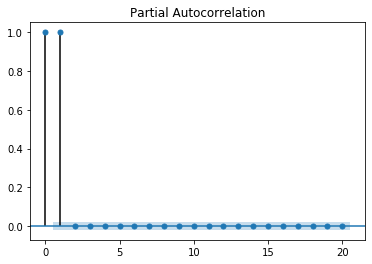

In [41]:
plot_pacf(ts_log_mov_diff.values[11:], lags=20)
plt.show()

LinAlgError: Singular matrix

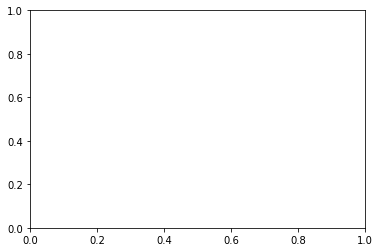

In [42]:
plot_pacf(ts_diff.values[11:], lags=20)
plt.show()

# Stationarity

"In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time." (Shay Palachy, Toward DataScience)


In [55]:
from statsmodels.tsa.stattools import adfuller 
#Applico il metodo Dickey Fuller per capire se la ts ha stagionalità. In particolare, calcolo un Test statistico e alcuni valori critici.
#Se il test statistico è < dei valori critici, posso dire che la serie è stazionaria.

In [56]:
dftest = adfuller(ts, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput) 
#Test statistic(-2.77) > critical value(-2.86) quindi non è stazionaria

Results of Dickey-Fuller Test:
Test Statistic                  -2.773110
p-value                          0.062219
#Lags Used                       7.000000
Number of Observations Used    372.000000
Critical Value (1%)             -3.448052
Critical Value (5%)             -2.869341
Critical Value (10%)            -2.570926
dtype: float64


In [57]:
dftest = adfuller(ts_log, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.257047
p-value                          0.648587
#Lags Used                      15.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


In [58]:
dftest = adfuller(ts_log_mov_diff.values[11:], autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.938690
p-value                          0.774964
#Lags Used                      17.000000
Number of Observations Used    351.000000
Critical Value (1%)             -3.449119
Critical Value (5%)             -2.869810
Critical Value (10%)            -2.571176
dtype: float64


In [59]:
dftest = adfuller(ts_diff.values[11:], autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.672612
p-value                          0.078899
#Lags Used                       8.000000
Number of Observations Used    359.000000
Critical Value (1%)             -3.448697
Critical Value (5%)             -2.869625
Critical Value (10%)            -2.571077
dtype: float64


# Decomposition

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\monia\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


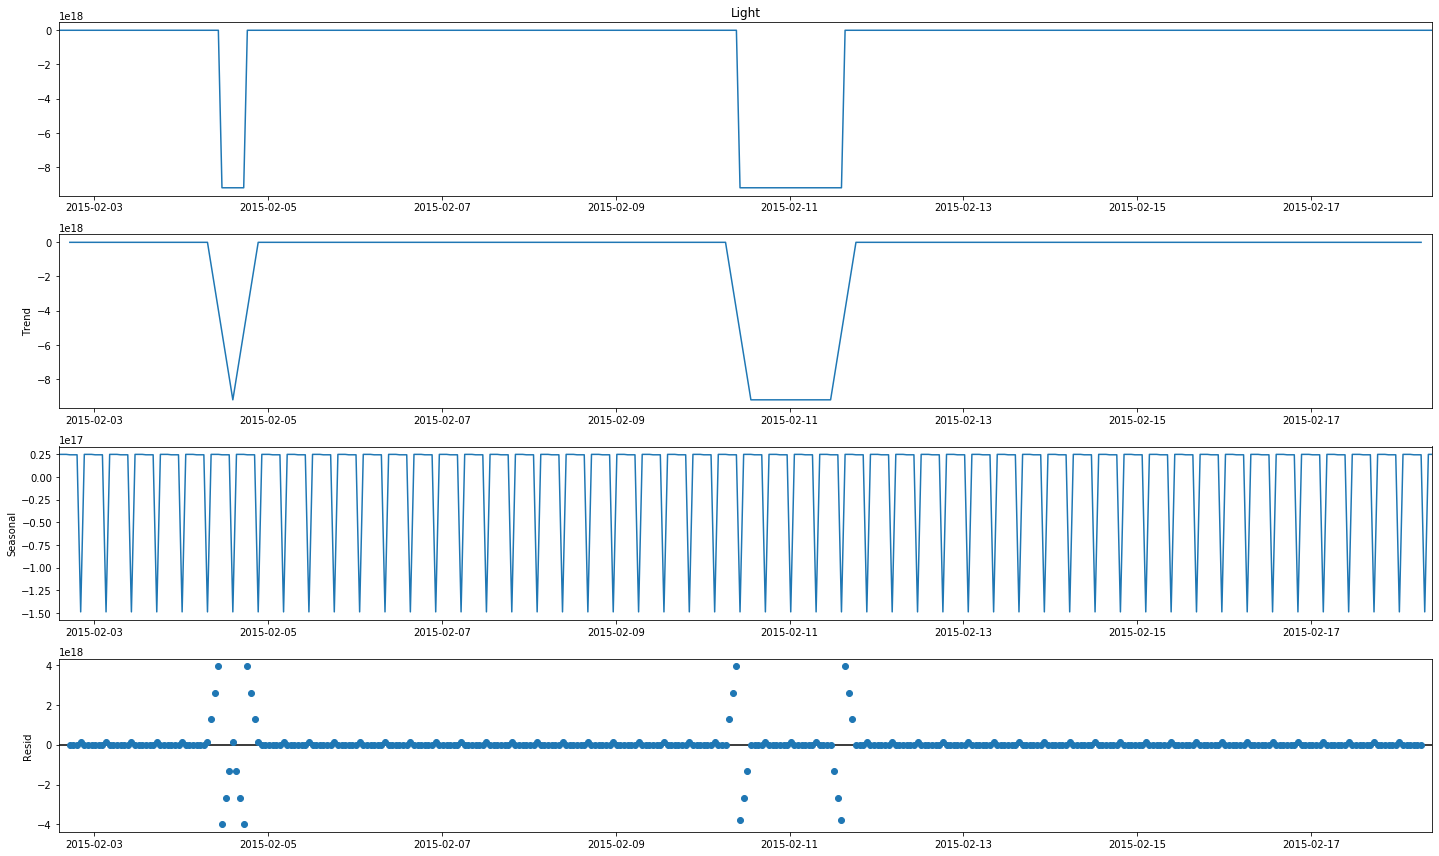

In [61]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 20, 12
decomposition = sm.tsa.seasonal_decompose(ts, model='additive', filt=None, two_sided=True, freq=7) # freq=1
fig = decomposition.plot()
plt.show()


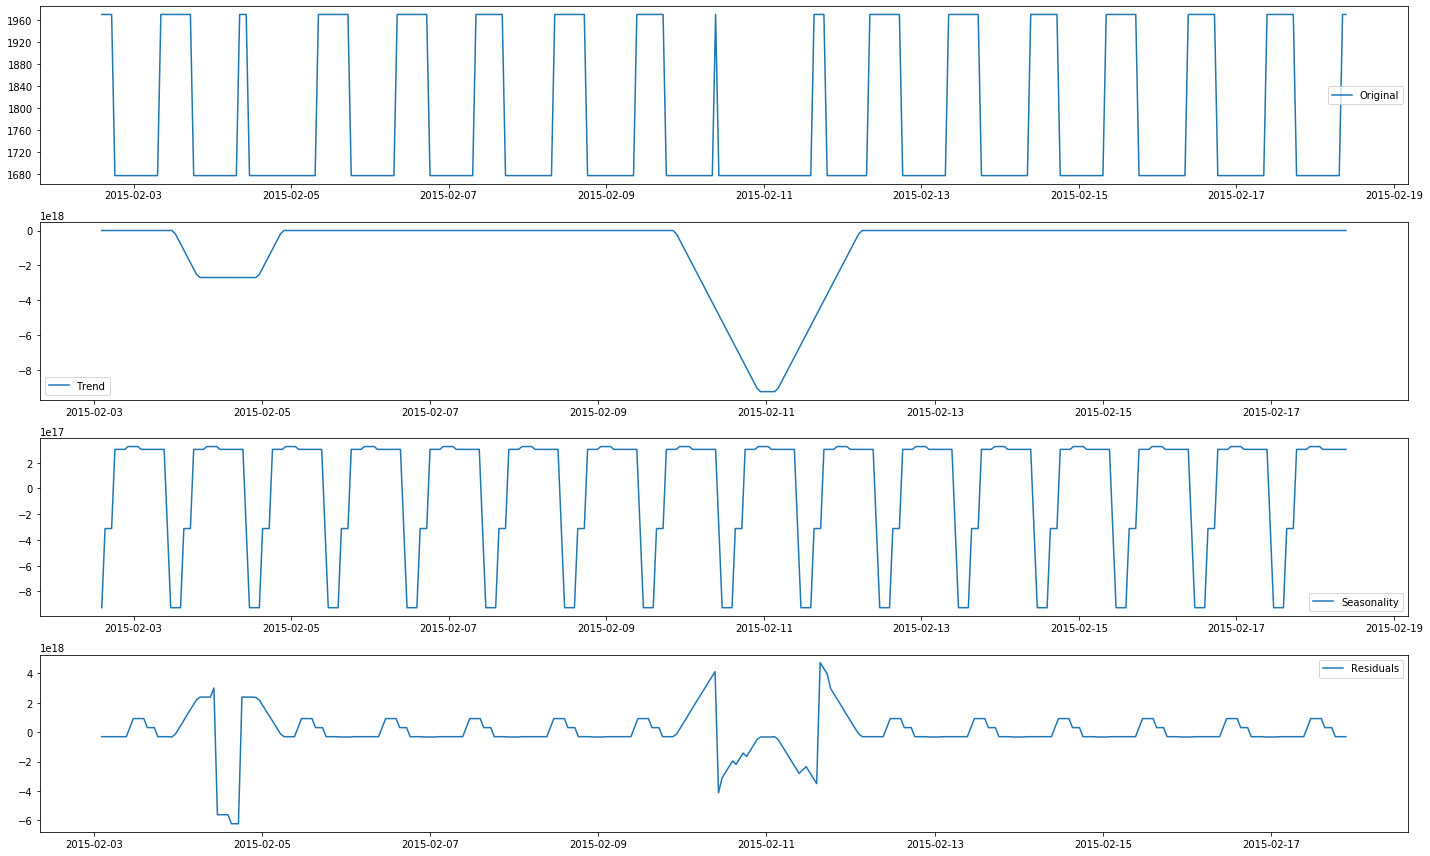

In [62]:
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [63]:
dftest = adfuller(residual.values, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

MissingDataError: exog contains inf or nans

# Forecasting

In [64]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [65]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


def r2_score(y_true, y_pred, ts):
    mu = np.mean(ts)
    total = np.sum((y_true - mu) ** 2)
    residuals = np.sum((y_true - y_pred) ** 2)
    return 1 - (residuals / total)


def absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_pred)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(absolute_percentage_error(y_true, y_pred))


def max_absolute_percentage_error(y_true, y_pred):
    return np.max(absolute_percentage_error(y_true, y_pred))


def total_absolute_percentage_error(y_true, y_pred):
    return np.sum(absolute_percentage_error(y_true, y_pred))


def evaluate(y_true, y_pred, ts):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAD': median_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred, ts),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'MAXAPE': max_absolute_percentage_error(y_true, y_pred),
        'TAPE': total_absolute_percentage_error(y_true, y_pred)
    }

In [66]:
split_index = 24*7
train, test = ts.iloc[:split_index], ts.iloc[split_index:]

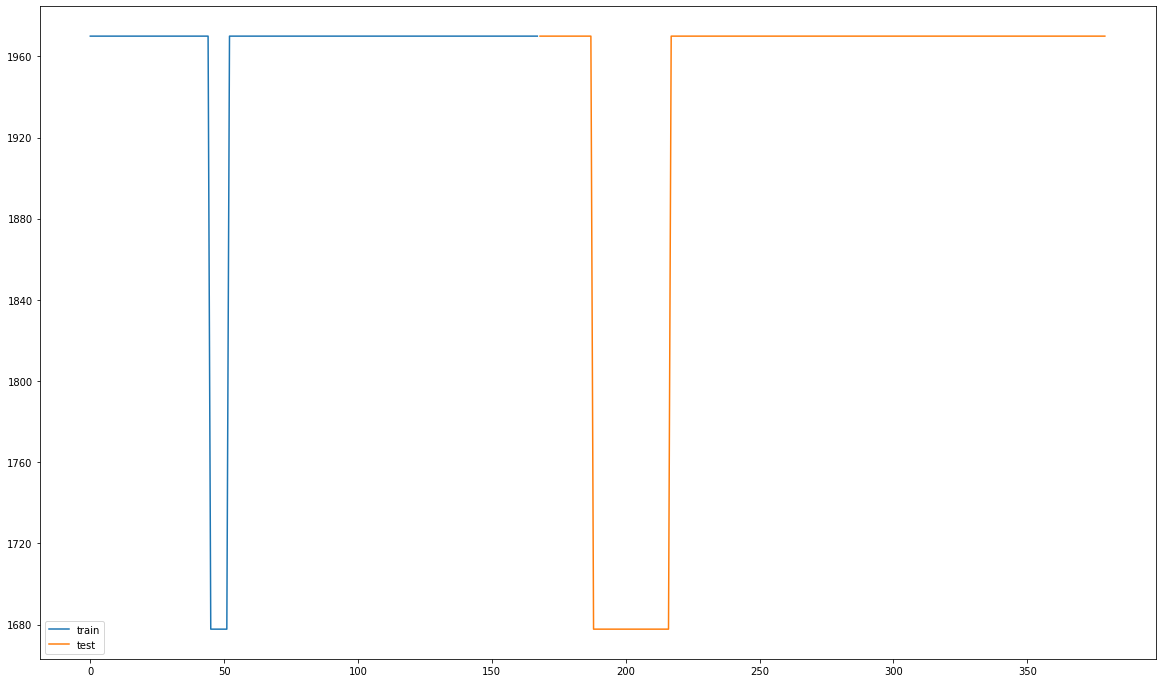

In [67]:
plt.plot(range(split_index), train, label='train')
plt.plot(range(split_index, len(ts)), test, label='test')
plt.legend()
plt.show()

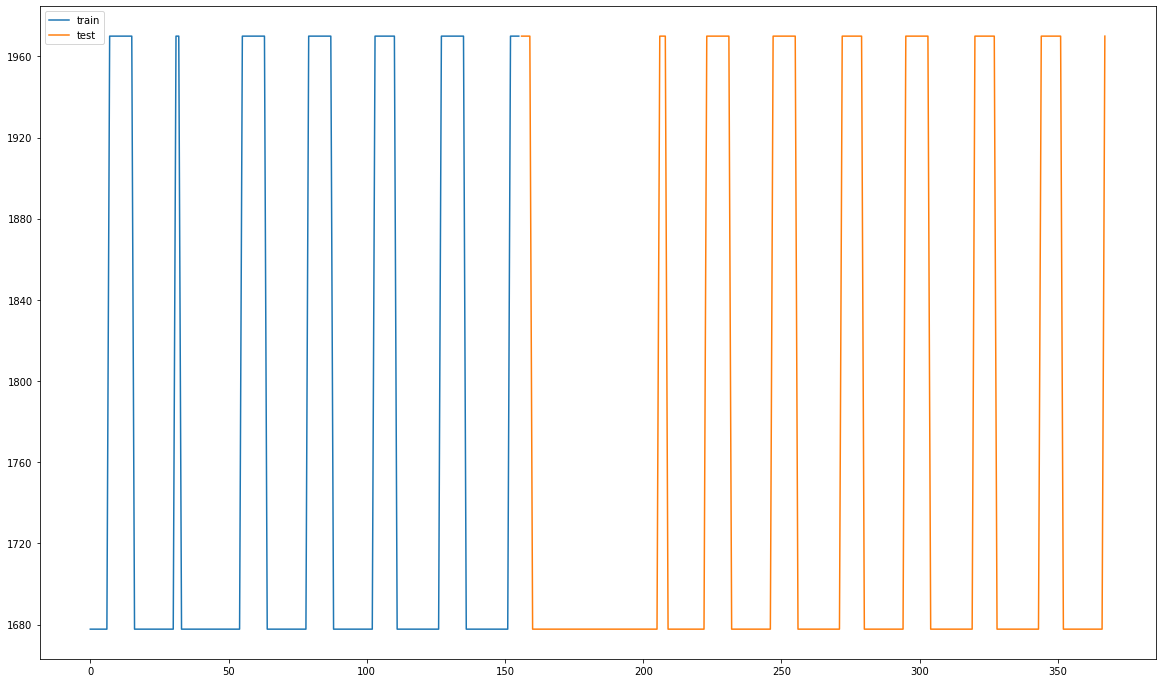

In [68]:
split_index = 24*7
train, test = ts_log_mov_diff.iloc[12:split_index], ts_log_mov_diff.iloc[split_index:]

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.legend()
plt.show()

In [70]:
smoothing_level = 0.1
ses = SimpleExpSmoothing(train).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('float64') and dtype('<M8[ns]')